# Tree direction test

In [1]:
import pandas as pd
import numpy as np

In [2]:
import shm_kmer_model.shm_kmer_model as shm_kmer_model

In [3]:
yale_model = shm_kmer_model.YaleSHM_Model()

In [4]:
from sample_reader.sample_reader import SampleReader
samples_fv = SampleReader().read('AbVitro/flu_time_course/FV/', ['25'])
samples_gmc = SampleReader().read('AbVitro/flu_time_course/GMC/', ['8'])
samples_ido = SampleReader().read('AbVitro/flu_time_course/IDO/')
samples_age = SampleReader().read('age/')
samples_paired = SampleReader().read('AbVitro/paired/')
from shm_kmer_model_estimator.shm_kmer_model_estimator import ShmKmerModelEstimator
estimator = ShmKmerModelEstimator()
est_model = estimator.estimate_models_of_one_type((samples_age,
                                                   samples_ido,
                                                   samples_fv,
                                                   samples_gmc,
                                                   samples_paired
                                                  ),
                                                  chains=['IGH'])

NoKNeighbours: IGH
NoKNeighbours: IGH


/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/andrewbzikadze/anaconda/envs/python2.7/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


Trivial: IGH
Trivial: IGH


In [6]:
import tree_test_utilities.tree_test_utilities as tree_test_utilities

In [7]:
tester = tree_test_utilities.TreeTester(minimal_size_filtered_tree=30)

In [46]:
result = tester.get_consistency_statistics(yale_model, mismatch_strategy='NoKNeighbours',
    tree_path='tree_test_utilities/raji_compressed/clonal_trees/clonal_tree_2-0_Vsize_1431_Esize_1341.tree')
np.mean(result)

0.44444444444444442

0.44444444444444442

In [47]:
result = tester.get_consistency_statistics(est_model['NoKNeighbours']['IGH'], mismatch_strategy='NoKNeighbours',
    tree_path='tree_test_utilities/raji_compressed/clonal_trees/clonal_tree_2-0_Vsize_1431_Esize_1341.tree')
np.mean(result)

0.14285714285714285

0.14285714285714285

In [10]:
from special_utils.cd_manager import cd
from special_utils.largest_files_in_dir import n_largest_files

In [11]:
def get_flu_trees_paths(n_largest_trees=5,
                        common_prefix='/Users/andrewbzikadze/chihua/home/aslabodkin/trees/trees_res'):
    flu_inds = ['IDO', 'FV', 'GMC']
    import os, re
    paths = []
    for flu_ind in flu_inds:
        ind_prefix = os.path.join(common_prefix, flu_ind)
        with cd(ind_prefix):
            dir_list = filter(os.path.isdir, os.listdir(ind_prefix))
            dir_list = filter(lambda x: re.match(r'.*_heavy', x), dir_list)
            for dir_id in dir_list:
                dataset_prefix = os.path.join(os.getcwd(), dir_id, 'clonal_trees')
                paths += n_largest_files(dataset_prefix, n_largest_trees)
    return paths

In [12]:
flu_trees_paths = get_flu_trees_paths(7)

In [13]:
results = dict.fromkeys(['Yale', 'CAB_NoKNeighbours', 'CAB_Trivial'])
for key in results:
    results[key] = {'Trivial': np.array([]), 'NoKNeighbours': np.array([])}
for flu_tree_path in flu_trees_paths:
    for strategy in ['Trivial', 'NoKNeighbours']:
        results['Yale'][strategy] =\
        np.append(results['Yale'][strategy],
                  [np.mean(tester.get_consistency_statistics(yale_model,
                                                            mismatch_strategy=strategy,
                                                            tree_path=flu_tree_path))])
        results['CAB_NoKNeighbours'][strategy] =\
        np.append(results['CAB_NoKNeighbours'][strategy],
                  [np.mean(tester.get_consistency_statistics(est_model['NoKNeighbours']['IGH'],
                                                            mismatch_strategy=strategy,
                                                            tree_path=flu_tree_path))])
        results['CAB_Trivial'][strategy] =\
        np.append(results['CAB_Trivial'][strategy],
                  [np.mean(tester.get_consistency_statistics(est_model['Trivial']['IGH'],
                                                             mismatch_strategy=strategy,
                                                             tree_path=flu_tree_path))])

In [14]:
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


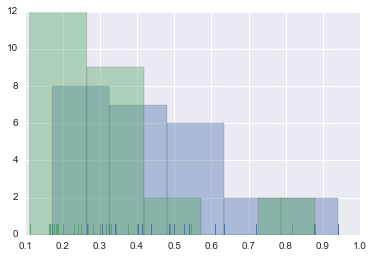

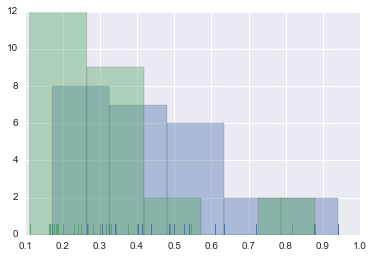

In [21]:
draw_distplot = (lambda x: sns.distplot(x[~np.isnan(x)], bins=5, rug=True, kde=False))
draw_distplot(results['Yale']['NoKNeighbours'])
draw_distplot(results['CAB_NoKNeighbours']['Trivial'])


In [16]:
np.nanmedian(results['Yale']['NoKNeighbours'])

0.40322580645161288

0.40322580645161288

In [17]:
np.nanmedian(results['CAB_NoKNeighbours']['Trivial'])

0.26829268292682928

0.26829268292682928

In [18]:
np.nanmedian(results['CAB_NoKNeighbours']['NoKNeighbours'])

0.28125

0.28125

In [19]:
np.nanmedian(results['CAB_Trivial']['NoKNeighbours'])

0.34375

0.34375

In [20]:
np.nanmedian(results['CAB_Trivial']['Trivial'])

0.34210526315789475

0.34210526315789475